In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageOps
import os
from sklearn.model_selection import train_test_split

In [2]:
labels = pd.read_excel('labels.xls', header=None, names=['digit_name', 'label'])

In [3]:
labels

,digit_name,label
0,digit_0,1
1,digit_1,4
2,digit_2,2
3,digit_3,3
4,digit_4,1
...,...,...
1388,digit_1542,0
1389,digit_1544,5
1390,digit_1545,0
1391,digit_1546,3


<AxesSubplot:>

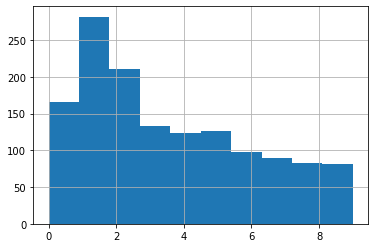

In [4]:
labels['label'].hist()

In [5]:
images=[]
for i in range(1,3):
    for file in sorted(os.listdir('archive/BDRW_train_'+str(i)),key=lambda s : int(s.split('_')[-1].split('.')[0])):    
         if file.endswith('.jpg'):
            img=Image.open(os.path.join('archive/BDRW_train_'+str(i),file),)
            img=img.resize((48,48))
            img=np.array(img)
            images.append(img)

In [6]:
images=np.array(images)
train=images/255

In [7]:
labels=np.array(labels['label'])

In [18]:
def create_model():
    inputs=tf.keras.Input(shape=(48,48,3))
    x=tfl.Conv2D(filters=64,kernel_size=3,strides=1,padding='same')(inputs)
    x=tfl.Conv2D(filters=64,kernel_size=3,strides=1,padding='same')(x)
    x=tfl.MaxPooling2D(pool_size=2,strides=2,padding='valid')(x)
    x=tfl.BatchNormalization()(x,training=True)
    x=tfl.Conv2D(filters=128,kernel_size=3,strides=1,padding='same')(x)
    x=tfl.Conv2D(filters=128,kernel_size=3,strides=1,padding='same')(x)
    x=tfl.Dropout(0.1)(x)
    x=tfl.MaxPooling2D(pool_size=2,strides=2,padding='valid')(x)
    x=tfl.BatchNormalization()(x,training=True)
    x=tfl.Conv2D(filters=256,kernel_size=3,strides=1,padding='same')(x)
    x=tfl.Conv2D(filters=256,kernel_size=3,strides=1,padding='same')(x)
    x=tfl.Dropout(0.15)(x)
    x=tfl.MaxPooling2D(pool_size=2,strides=2,padding='valid')(x)
    x=tfl.BatchNormalization()(x,training=True)
    x=tfl.Flatten()(x)
    x=tfl.Dense(32,activation='relu',kernel_initializer='glorot_uniform')(x)
    x=tfl.Dense(10,activation='softmax')(x)
    model=tf.keras.Model(inputs=inputs,outputs=x)
    return model

In [19]:
model_1=create_model()
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 128)       7385

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(train,labels,test_size=0.25,random_state=1)

In [21]:
def hot_encode(a):
    b = np.zeros((a.size, a.max() + 1))
    b[np.arange(a.size), a] = 1
    return b

In [22]:
Y_train=hot_encode(Y_train)
Y_test=hot_encode(Y_test)

In [23]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00025,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [24]:
model_1.fit(X_train,Y_train,epochs=15,validation_split=0.1)

Epoch 1/15
30/30 [==============================] - 9s 290ms/step - loss: 1.6138 - accuracy: 0.4718 - val_loss: 0.9054 - val_accuracy: 0.6952
Epoch 2/15
30/30 [==============================] - 9s 283ms/step - loss: 0.6522 - accuracy: 0.8200 - val_loss: 0.5684 - val_accuracy: 0.7905
Epoch 3/15
30/30 [==============================] - 9s 285ms/step - loss: 0.3682 - accuracy: 0.9084 - val_loss: 0.4057 - val_accuracy: 0.8667
Epoch 4/15
30/30 [==============================] - 9s 286ms/step - loss: 0.2290 - accuracy: 0.9414 - val_loss: 0.3478 - val_accuracy: 0.8952
Epoch 5/15
30/30 [==============================] - 9s 289ms/step - loss: 0.1303 - accuracy: 0.9723 - val_loss: 0.2863 - val_accuracy: 0.8952
Epoch 6/15
30/30 [==============================] - 9s 291ms/step - loss: 0.0706 - accuracy: 0.9894 - val_loss: 0.2522 - val_accuracy: 0.9143
Epoch 7/15
30/30 [==============================] - 9s 296ms/step - loss: 0.0533 - accuracy: 0.9925 - val_loss: 0.2512 - val_accuracy: 0.9143
Epoch 

In [25]:
model_1.evaluate(X_test,Y_test)

11/11 [==============================] - 1s 71ms/step - loss: 0.2973 - accuracy: 0.9312


[0.2973424792289734, 0.9312320947647095]